In [ ]:
#  Import all the modules that we need
#  numpy - math for python
#  scipy - math toolkit, contains least square fitting
#  matplotlib - plotting

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit
import scipy.optimize as opt
%matplotlib inline

In [ ]:
# Read in the muon data, save it to a list if 
# it is not a clock timeout

In [4]:
f=open('18-09-11-11-42.data','r')

data=[]

for line in f.readlines():
    line = line.strip().split()
    dat = float(line[0])
    
    if (dat < 20000):   #clock times greater than 20000 ns are timeouts
        data.append(dat) #and should be ignored
        
        
print(len(data))

177


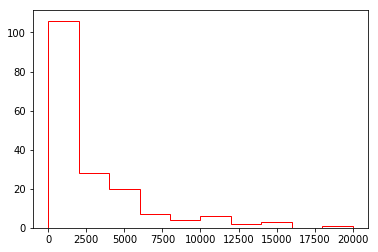

In [6]:
n, bins, _ = plt.hist(data, bins=np.arange(0.0, 21000.0, 2000.0), color='w', edgecolor='r', histtype='step')
#Get the data in histogram form, save the number of events in each bin as the list n,
#bin edges as bins

In [80]:
yerr=[]
xerr=[]
for i in range(len(n)):
    if (n[i] !=0):
        err = np.sqrt(n[i]) #error on the number in the bin from
    else:                   #Poisson statistics
        err=1
    yerr.append(err) 
    xerr.append(100)        #Error determined from clock time measurements

In [81]:
x=np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    x[i]=bins[i]+500   #get the bin centers for plotting

In [49]:
def func(y, a, b,c):
    return a* np.exp(-y/b) + c   #define the fit function, an exponential with a constant term

err = np.asarray(yerr) #make the error an array
time = np.asarray(x)   #"    x         "     "
evts = np.asarray(n)   #" the event rate  "     "
popt, pcov = curve_fit(func, time, evts, sigma = err, p0=[n[0],2117.2,0])  #least squares fit using the fit
# function, our events, and the error on the event rate in each bin

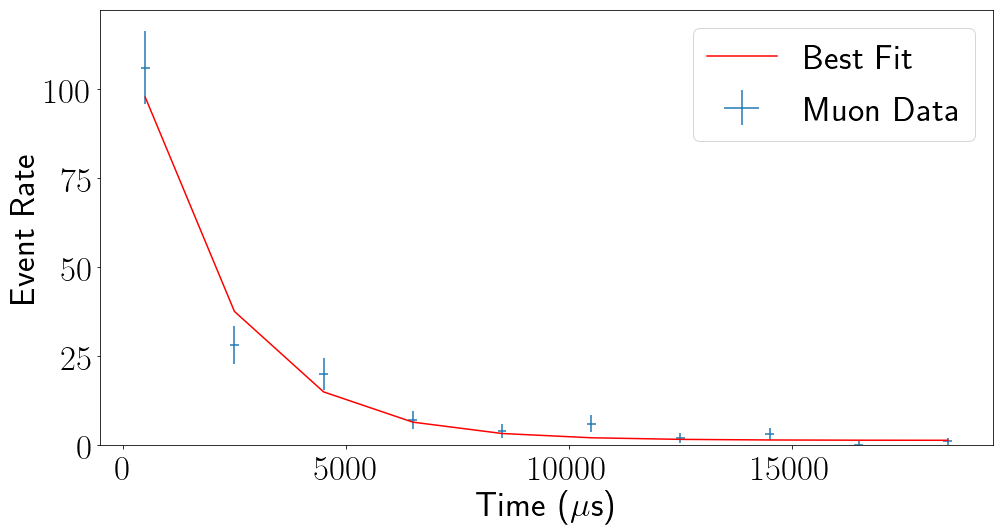

In [86]:
rc('text', usetex=True) #use LaTeX

fig=plt.figure(figsize=(16,8)) #Make the figure big enough

plt.errorbar(x,n,yerr=yerr,xerr=xerr,linestyle="None",label="Muon Data") #plot the data
plt.plot(x,func(x,*popt),color='r',label="Best Fit") #plot the fit
plt.gca().set_ylim(bottom=0) #make the plot bottom 0.0
plt.xlabel("Time ($\mu$s)",fontsize=35) #label axes
plt.ylabel("Event Rate", fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.legend(loc='best',fontsize=35) #add a legend

plt.savefig('example_fit.pdf') #save the figure

In [51]:
print(popt) #Best fit parameters
print(pcov) #Covariance Matrix

[1.23136613e+02 2.04291878e+03 1.30846687e+00]
[[ 3.25256163e+02 -3.69384027e+03  1.69620668e+00]
 [-3.69384027e+03  8.48748659e+04 -7.80138132e+01]
 [ 1.69620668e+00 -7.80138132e+01  5.33802243e-01]]


In [52]:
lifetime = popt[1] #Get lifetime from our parameters
 
m = 105.658*10**6 # eV
hc = 2*10**(-5) # eV * cm 
c = 3*10**10 #natural units

tauplus = 2196.9803 # micro-seconds, Weber 2011
tauminus = 2043 # micro-seconds, Teach Spin

rho = -(tauplus/tauminus)*((tauminus - lifetime)/(tauplus - lifetime)) #ratio of plus/minus muons

GF = np.sqrt((192 * np.pi**3 * hc)/(lifetime*10**-9 * (m)**5 * c))    #GF/(hbar*c)^3 actually

In [83]:
dT = np.sqrt(pcov[1][1])+lifetime*(np.sqrt(2*(0.001)**2+pcov[2][2]/(popt[2]**2)+(0.05)**2)) #uncertainty in lifetime
drho = rho*(dT/lifetime) #uncertainty in ratio
dG = GF*(dT/lifetime) #uncertainty in GF

In [84]:
print('Per our fit, the lifetime is extrapolated as',round(lifetime, 1),'+/-',dT,' ns')
print('Using our lifetime, G_F =',round(GF*10**23,4),'+/-',dG*10**23,'x10^-5 GeV^-2')
print('Using our lifetime, rho =',rho,'+/-',drho)

Per our fit, the lifetime is extrapolated as 2042.9 +/- 1436.6194846047458  ns
Using our lifetime, G_F = 1.2146 +/- 0.8541594131176377 x10^-5 GeV^-2
Using our lifetime, rho = -0.0005669357194643211 +/- -0.0003986800207687531
